In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [50]:
df = pd.read_csv("C:/Users/Мария/Downloads/ha_data/ha_data.csv", sep=";")
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [51]:
events = df["title"].value_counts()
events

banner_show     7393319
banner_click     829185
order            248722
Name: title, dtype: int64

In [52]:
poster = df[df["title"] == "banner_show"]
poster = poster["product"].value_counts().to_frame()
poster

,product
company,1580238
sports_nutrition,1465970
clothes,1453128
sneakers,1453029
accessories,1440954


In [53]:
poster["product"].astype(int)

company             1580238
sports_nutrition    1465970
clothes             1453128
sneakers            1453029
accessories         1440954
Name: product, dtype: int32

(-1.1118834921298268,
 1.1005658805776108,
 -1.1210389629642945,
 1.1234556814681087)

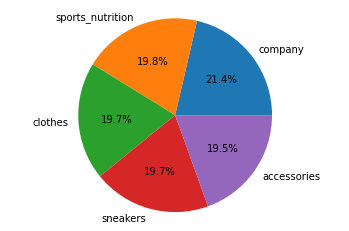

In [54]:
vals = poster["product"]
labels = poster.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

                  product
clothes            220595
sneakers           182597
sports_nutrition   144918
company            144821
accessories        136254


(-1.1127684882479927,
 1.1006080232499045,
 -1.1023965946393381,
 1.1095333712328979)

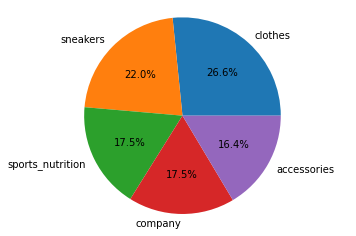

In [55]:
clicks = df[df["title"] == "banner_click"]
clicks = clicks["product"].value_counts().to_frame()
print(clicks)

vals = clicks["product"]
labels = clicks.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

                  product
clothes            112715
sneakers            67719
accessories         44551
sports_nutrition    23737


(-1.1106565278237575,
 1.1005074537058932,
 -1.1192095043207841,
 1.1264155093560158)

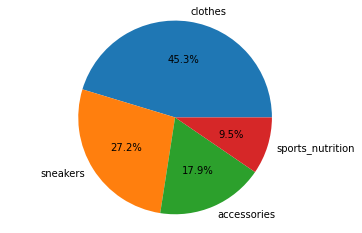

In [56]:
bought = df[df["title"] == "order"]
bought = bought["product"].value_counts().to_frame()
print(bought)

vals = bought["product"]
labels = bought.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

In [57]:
df["seconds"] = df['time'].map(lambda x: (datetime.strptime(x, "%Y-%m-%d %H:%M:%S") - datetime(1, 1, 1)).total_seconds())
df

,order_id,page_id,product,site_version,time,title,user,seconds
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0,6.362227e+10
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0,6.362206e+10
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1,6.362129e+10
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1,6.362761e+10
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1,6.362129e+10
...,...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616,6.363115e+10
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617,6.363156e+10
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618,6.363087e+10
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619,6.363160e+10


C:\Users\Мария\AppData\Local\Temp\ipykernel_9364\2942295996.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.repeat(["banner_show", "order", "banner_click"], 1), rotation=0, fontsize=12)


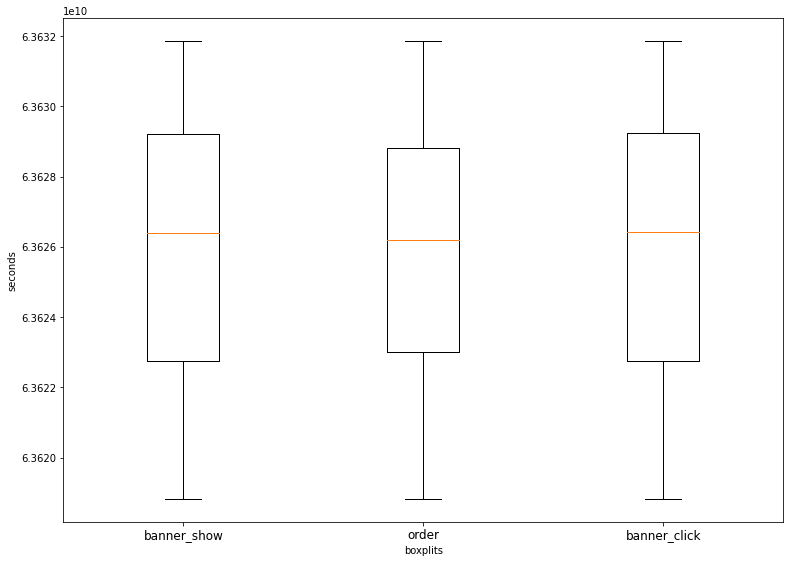

In [58]:
df_show = df.loc[df["title"] == "banner_show"]
df_order = df.loc[df["title"] == "order"]
df_click = df.loc[df["title"] == "banner_click"]

data = [df_show["seconds"], df_order["seconds"], df_click["seconds"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(np.repeat(["banner_show", "order", "banner_click"], 1), rotation=0, fontsize=12)

# Creating plot
bp = ax.boxplot(data)

plt.xlabel("boxplits")
plt.ylabel("seconds")

# show plot
plt.show()

In [11]:
df.sort_values(axis = 0, by="seconds")

,order_id,page_id,product,site_version,time,title,user,seconds
2989252,NaN,7446868.0,accessories,desktop,2017-01-01 00:00:03,banner_show,user_1365850,6.361883e+10
2407919,NaN,5639042.0,accessories,mobile,2017-01-01 00:00:05,banner_show,user_1064565,6.361883e+10
2595058,NaN,7310704.0,clothes,desktop,2017-01-01 00:00:15,banner_show,user_1162467,6.361883e+10
1764739,NaN,3745903.0,sneakers,mobile,2017-01-01 00:00:25,banner_show,user_742569,6.361883e+10
3918929,NaN,10200275.0,company,desktop,2017-01-01 00:00:25,banner_show,user_1827807,6.361883e+10
...,...,...,...,...,...,...,...,...
8151182,NaN,23601866.0,company,mobile,2017-05-31 23:59:37,banner_show,user_4047676,6.363187e+10
8165105,NaN,23658876.0,clothes,desktop,2017-05-31 23:59:40,banner_show,user_4056326,6.363187e+10
8363442,NaN,24446787.0,sports_nutrition,mobile,2017-05-31 23:59:51,banner_click,user_4182938,6.363187e+10
7808442,NaN,22326691.0,clothes,mobile,2017-05-31 23:59:53,banner_show,user_3843064,6.363187e+10


Text(0, 0.5, 'number of actions')

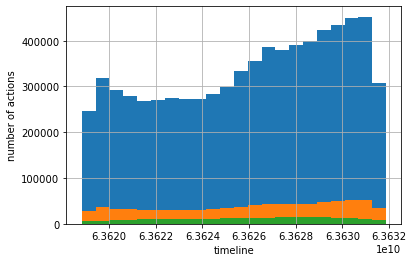

In [48]:
df['seconds'].astype(int)

h = df_show['seconds'].hist(bins = 22)

h = df_click['seconds'].hist(bins = 22)

h = df_order['seconds'].hist(bins = 22)

plt.xlabel("timeline")
plt.ylabel("number of actions")

Text(0, 0.5, 'number of actions')

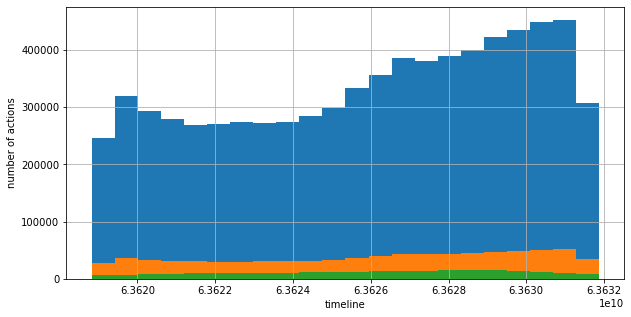

In [47]:
plt.figure(figsize=(10, 5))

h = df_show['seconds'].hist(bins = 22)
h = df_click['seconds'].hist(bins = 22)
h = df_order['seconds'].hist(bins = 22)

plt.xlabel("timeline")
plt.ylabel("number of actions")